# SQL Практика

В этом проекте я буду анализировать данные из csv таблицы с помощью синтаксиса SQL

In [36]:
import pandas as pd
# импортируем pandas для работы с csv файлом

In [37]:
import pandasql as ps  # библиотека для того, чтобы делать SQL запросы к dataframe объектам

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
csv = pd.read_csv('vgsales.csv')  # импортируем csv файл в pandas dataframe

In [40]:
csv.head()  # проверим, что всё получилось

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [41]:
csv.drop('Rank', axis=1, inplace=True)  # выкинем столбец Rank

In [43]:
csv.head()  # проверим, что всё получилось

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Таблица содержит данные о продажах видеоигр:  
- <b>Name</b> - название игры  
- <b>Platform</b> - платформа (игровое устройство)  
- <b>Year</b> - год продаж  
- <b>Genre</b>	- жанр игры  
- <b>Publisher</b> - издатель игры  
- <b>NA_Sales</b> - продажи игры в Северной Америке  
- <b>EU_Sales</b> - продажи игры в Европе  
- <b>JP_Sales</b> - продажи игры в Японии  
- <b>Other_Sales</b> - продажи игры в остальных регионах  
- <b>Global_Sales</b> - продажи игры по всему миру

### Начнём исследовать данные с помощью SQL запросов

In [53]:
ps.sqldf("select * from csv limit 5")  # заглянем внутрь таблицы

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [55]:
ps.sqldf("select count(Name) from csv")  # узнаем, сколько строк в таблице

,count(Name)
0,16598


In [62]:
ps.sqldf("select count(distinct Name) unique_names, count(distinct Platform) unique_platforms, \
         count(distinct Genre) unique_genres, count(distinct Publisher) unique_publishers from csv")
# количество уникальных игр, платформ, жанров и издателей

,unique_names,unique_platforms,unique_genres,unique_publishers
0,11493,31,12,578


In [54]:
ps.sqldf("select min(year) min_year, max(year) max_year from csv")
# узнаем за какой период есть данные о продажах

,min_year,max_year
0,1980.0,2020.0


### Продажи за всё время: глобальные и по регионам

In [63]:
ps.sqldf("select sum(Global_Sales), sum(NA_Sales), sum(EU_Sales), sum(JP_Sales), sum(Other_Sales) from csv")

,sum(Global_Sales),sum(NA_Sales),sum(EU_Sales),sum(JP_Sales),sum(Other_Sales)
0,8920.44,4392.95,2434.13,1291.02,797.75


### Продажи по годам + график

In [136]:
ps.sqldf("select Year, sum(Global_Sales) from csv \
        group by Year limit 5")

,Year,sum(Global_Sales)
0,NaN,100.08
1,1980.0,11.38
2,1981.0,35.77
3,1982.0,28.86
4,1983.0,16.79


Оказалось, что в столбце Year есть NaN значение. Выведем таблицу без него, и сохраним её в переменную:

In [137]:
sales_by_year = ps.sqldf("select Year, sum(Global_Sales) from csv \
        where Year is not null group by Year limit 5")
sales_by_year

,Year,sum(Global_Sales)
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36


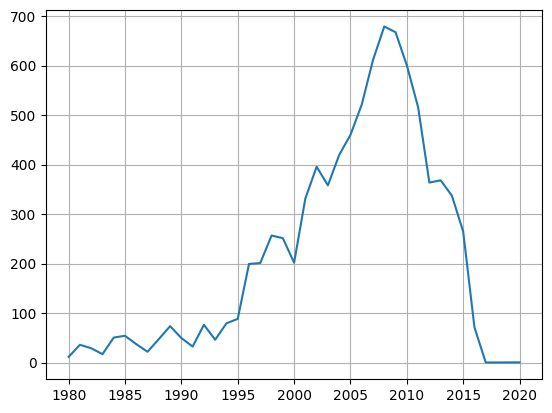

In [77]:
plt.plot(sales_by_year['Year'], sales_by_year['sum(Global_Sales)'])
plt.grid()

### Продажи по жанрам + график

In [92]:
sales_by_genre = ps.sqldf("select Genre, sum(Global_Sales) from csv \
        group by Genre order by sum(Global_Sales) desc")
sales_by_genre

,Genre,sum(Global_Sales)
0,Action,1751.18
1,Sports,1330.93
2,Shooter,1037.37
3,Role-Playing,927.37
4,Platform,831.37
5,Misc,809.96
6,Racing,732.04
7,Fighting,448.91
8,Simulation,392.20
9,Puzzle,244.95


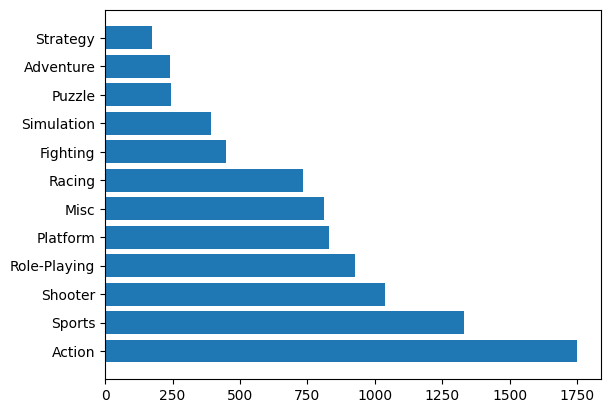

In [96]:
plt.barh(avg_sales_by_genre['Genre'], sales_by_genre['sum(Global_Sales)'])
plt.show()

### Топ 5 игр по продажам за всё время

In [87]:
top5_games_by_sales = ps.sqldf("select Name, sum(Global_Sales) from csv \
                                group by Name order by sum(Global_Sales) desc limit 5")
top5_games_by_sales

,Name,sum(Global_Sales)
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.82


### Топ 5 платформ по продажам за всё время

In [88]:
top5_platforms_by_sales = ps.sqldf("select Platform, sum(Global_Sales) from csv \
                                group by Platform order by sum(Global_Sales) desc limit 5")
top5_platforms_by_sales

,Platform,sum(Global_Sales)
0,PS2,1255.64
1,X360,979.96
2,PS3,957.84
3,Wii,926.71
4,DS,822.49


### Топ 5 издателей по продажам за всё время

In [135]:
top5_publishers_by_sales = ps.sqldf("select Publisher, sum(Global_Sales) from csv \
                                group by Publisher order by sum(Global_Sales) desc limit 5")
top5_publishers_by_sales

,Publisher,sum(Global_Sales)
0,Nintendo,1786.56
1,Electronic Arts,1110.32
2,Activision,727.46
3,Sony Computer Entertainment,607.50
4,Ubisoft,474.72


### Самые продаваемые игры для каждого жанра

In [102]:
sales_by_name_and_genre = ps.sqldf("select Name, Genre, sum(Global_Sales) sum_sales from csv \
        group by Name, Genre order by sum(Global_Sales) desc")
sales_by_name_and_genre  # сначала создадим таблицу с суммой продаж по играм + жанр каждой игры

,Name,Genre,sum_sales
0,Wii Sports,Sports,82.74
1,Grand Theft Auto V,Action,55.92
2,Super Mario Bros.,Platform,45.31
3,Tetris,Puzzle,35.84
4,Mario Kart Wii,Racing,35.82
...,...,...,...
11492,Zero no Tsukaima: Maigo no Period to Ikusen no...,Adventure,0.01
11493,ef - a fairy tale of the two.,Adventure,0.01
11494,htoL#NiQ: The Firefly Diary,Platform,0.01
11495,th!nk Logic Trainer,Puzzle,0.01


In [134]:
top_games_by_genre = ps.sqldf("select Genre, Name from sales_by_name_and_genre \
                                group by Genre order by max(sum_sales) desc")
top_games_by_genre  # отберем самую продаваемую игру по каждому жанру

,Genre,Name
0,Sports,Wii Sports
1,Action,Grand Theft Auto V
2,Platform,Super Mario Bros.
3,Puzzle,Tetris
4,Racing,Mario Kart Wii
5,Role-Playing,Pokemon Red/Pokemon Blue
6,Shooter,Call of Duty: Black Ops
7,Misc,Wii Play
8,Simulation,Nintendogs
9,Fighting,Super Smash Bros. Brawl
